# Catalogue Plots
Make paper plots that illustrate the basic properties of the quasar population using the catalogue data.

In [1]:
import os
import glob
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import QTable
from astropy.wcs import WCS
from astropy.io import fits

import matplotlib.pyplot as plt

## Load Data

In [2]:
# directory where the L-Band continuum images are stored
imdir = "/rds/user/pmk46/hpc-work/19A-056/final"

# path to catalogue table
qso_catalog = QTable.read('../tables/Quasar_catalog_Banados+16_Matsuoka+19a_Matsuoka+19b_Wang+18_Wang+19_Reed+19_Yang+20.txt', format='ascii')

# initialise data lists
ref_names, z_list, M_list, ra_list, dec_list, authors = [], [], [], [], [], []
obsnames = []

# get quasar names from images
for i, imfits in enumerate(glob.glob(os.path.join(imdir, "images/*.fits"))):
    obsname = list(imfits.split("/")[-1][:14])
    obsname[3] = "_"
    obsname = "".join(obsname)
    obsnames.append(obsname)

# load catalogue data
for row in qso_catalog:
    if row["QSO-Name"] in obsnames:
        ref_names.append(row["Ref-Name"].replace("~", " ").replace("--", "-"))
        z_list.append(row["Redshift"])
        M_list.append(row["M_1450"])
        authors.append(row["Ref"])
        ra_list.append(row["RA"])
        dec_list.append(row["Dec"])

# convert lists to numpy arrays
ref_names = np.array(ref_names)
z_list = np.array(z_list)
M_list = np.array(M_list)
ra_list = np.array(ra_list)
dec_list = np.array(dec_list)
authors = np.array(authors)

# load Banados+16 quasars
banados16 = np.loadtxt("/rds/user/pmk46/hpc-work/19A-056/pipeline/tables/Banados+16.txt", dtype=str, delimiter=",").T
names = np.array([name.strip() for name in banados16[0]])

## Plots

### Plot Absolute UV Magnitude vs Redshift

116 22


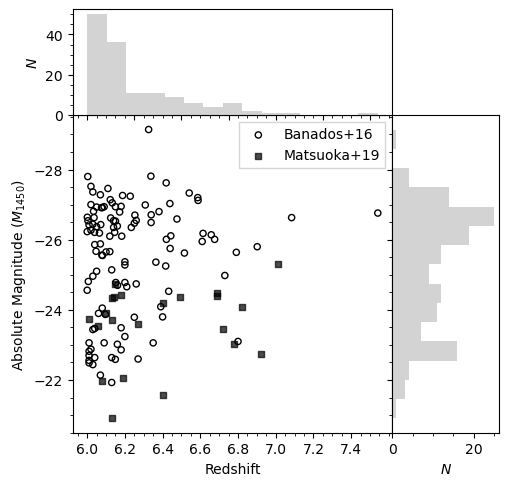

In [4]:
# Create figure and axes
fig = plt.figure(figsize=(5.5, 5.5))

# Create subplots
gs = fig.add_gridspec(4, 4)
ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_histx = fig.add_subplot(gs[0, 0:3])
ax_histy = fig.add_subplot(gs[1:4, 3])

# Scatter plot
print(len(z_list[authors=="Banados+16"]), len(z_list[authors=="Matsuoka+19b"]))
ax_main.scatter(z_list[authors=="Banados+16"], M_list[authors=="Banados+16"], c="None", edgecolors="k", marker="o", s=20, label="Banados+16")
ax_main.scatter(z_list[authors=="Matsuoka+19b"], M_list[authors=="Matsuoka+19b"], alpha=0.7, c="k", edgecolors="k", s=20, marker="s", label="Matsuoka+19")

# THESE ARE CURRENTLY NOT INCLUDED IN OUR SURVEY
#ax_main.scatter(z_list[authors=="Matsuoka+19a"], M_list[authors=="Matsuoka+19a"], c="None", edgecolors="b", marker="o", label="Matsuoka+19a")
#ax_main.scatter(z_list[authors=="Wang+18"], M_list[authors=="Wang+18"], c="None", edgecolors="r", label="Wang+18")
#ax_main.scatter(z_list[authors=="Wang+19"], M_list[authors=="Wang+19"], c="None", edgecolors="orange", label="Wang+19")
#ax_main.scatter(z_list[authors=="Reed+19"], M_list[authors=="Reed+19"], c="None", edgecolors="c", label="Reed+19")
#ax_main.scatter(z_list[authors=="Yang+20"], M_list[authors=="Yang+20"], c="None", edgecolors="g", label="Yang+20")

ax_main.invert_yaxis()
ax_main.legend(fancybox=False)

# Histogram along the x-axis
ax_histx.hist(z_list, bins=15, color='lightgray', alpha=1.0,  orientation='vertical')
ax_histx.set_ylabel(r"$N$")
ax_histx.set_xticklabels([])

# Histogram along the y-axis
ax_histy.hist(M_list, bins=15, color='lightgray', alpha=1.0,  orientation='horizontal')
ax_histy.set_xlabel(r"$N$")
ax_histy.set_yticklabels([])
ax_histy.invert_yaxis()

# Set shared axis labels
ax_main.set_xlabel(r"Redshift")
ax_main.set_ylabel(r"Absolute Magnitude ($M_{1450}$)")

# Set tick labels for the main plot
ax_main.set_xticks(np.arange(6.0, 7.6, 0.2))  # Set x-tick locations
ax_main.set_yticks(np.arange(-28, -20, 2))  # Set y-tick locations

# Set minorticks
ax_main.minorticks_on()
ax_histx.minorticks_on()
ax_histy.minorticks_on()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Save plot
plt.savefig("../../plots/M_vs_z.pdf")

In [17]:
print("Median M1450: ", np.median(M_list))
print("Median Redshift: ", np.median(z_list))

-25.630000000000003 -28.11476496624225 1.6856985760037104


### Plot Quasar Positions on Sky Map

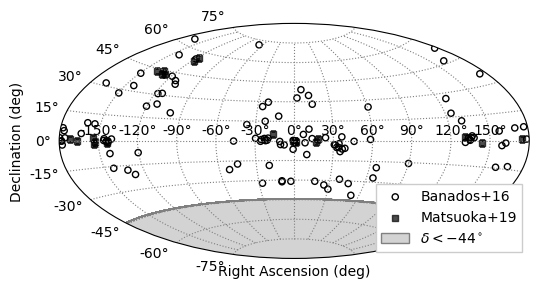

In [8]:
# Create a WCS object for the all-sky map
wcs = WCS(naxis=2)
wcs.wcs.equinox = 2000.0
wcs.wcs.crpix = [180.0, 90.0]
wcs.wcs.cdelt = np.array([-1.0, 1.0])
wcs.wcs.ctype = ["RA---CAR", "DEC--CAR"]

# Convert RA and Dec strings to numerical values (in degrees)
coords = SkyCoord(ra_list, dec_list, unit=(u.hourangle, u.deg))

# Extract the RA and Dec values in degrees
ra_deg = coords.ra.wrap_at(180 * u.deg).radian
dec_deg = coords.dec.radian

# Initialise plot and projection
fig = plt.figure(figsize=(5.5, 3.0))
ax = fig.add_subplot(111, projection="aitoff")

# Scatter plot
ax.scatter(ra_deg[authors=="Banados+16"], dec_deg[authors=="Banados+16"], color="None", edgecolor="k", alpha=1, marker="o", s=20, label="Banados+16")
ax.scatter(ra_deg[authors=="Matsuoka+19b"], dec_deg[authors=="Matsuoka+19b"], alpha=0.7, color="k", edgecolor="k", marker="s", s=20, label="Matsuoka+19")

# Shade area that is not covered by JVLA
ax.fill_between(np.linspace(-180, 180, 1000), -44 / 180  * np.pi * np.ones(1000), -np.pi/2 * np.ones(1000), color="gray", facecolor="lightgray", label=r"$\delta<-44^\circ$")

# Set grid, ticks, labels and legend
ax.grid(color='gray', linestyle='dotted')
ax.minorticks_on()
ax.set_xlabel('Right Ascension (deg)')
ax.set_ylabel('Declination (deg)')
ax.legend(loc=4, framealpha=1, fancybox=False)

# Save plot
plt.tight_layout()
plt.savefig("../../plots/qso_sky_map.pdf")

## Get References
Reference to quasars not detected in PS1

In [25]:
banados16 = np.loadtxt("/rds/user/pmk46/hpc-work/19A-056/pipeline/tables/Banados+16.txt", dtype=str, delimiter=",").T
names = np.array([name.strip() for name in banados16[0]])
z_list = banados16[3].astype(float)
ref_list = banados16[-3]
ps1_det = banados16[-4].astype(bool)

print("Number of z>6 quasars detected in PS1: ", np.sum(ps1_det[z_list>=6]))
print("References to quasars not detected in PS1: ", np.unique(ref_list[(z_list>=6) & (~ps1_det)]))


49
[' 10;13' ' 15' ' 18' ' 21' ' 24' ' 25' ' 27' ' 33' ' 42' ' 44' ' 46'
 ' 53' ' 53;57']
